# Sarcasm Detection
 **Acknowledgement**

Misra, Rishabh, and Prahal Arora. "Sarcasm Detection using Hybrid Neural Network." arXiv preprint arXiv:1908.07414 (2019).

**Required Files given in below link.**

https://drive.google.com/drive/folders/1xUnF35naPGU63xwRDVGc-DkZ3M8V5mMk

## Install `Tensorflow2.0` 

In [1]:
!!pip uninstall tensorflow
!pip install tensorflow==2.0.0

     |████████████████████████████████| 86.3MB 35kB/s 
     |████████████████████████████████| 450kB 50.0MB/s 
     |████████████████████████████████| 3.8MB 54.3MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=41d22e02ff31d32c96a357e52b4ec77b576c4c496d1640cf82e2d5a2af54718c
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.10.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: tensorboard 2.2.2
    Uninstalling tensorboard-2.2.2:
      Successfully uninstalled tensorboard-2.2.2
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3


## Get Required Files from Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [3]:
#Set your project path 
project_path =  '/content/drive/My Drive/Sarcasm Detection/'

#**## Reading and Exploring Data**

## Read Data "Sarcasm_Headlines_Dataset.json". Explore the data and get  some insights about the data. ( 4 marks)
Hint - As its in json format you need to use pandas.read_json function. Give paraemeter lines = True.

In [4]:
import pandas as pd
df = pd.read_json(project_path + "Sarcasm_Headlines_Dataset.json", lines=True)
df.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [5]:
print (df.shape)
df.describe()

(26709, 3)


,is_sarcastic
count,26709.000000
mean,0.438953
std,0.496269
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [6]:
df['headline'][1]

"the 'roseanne' revival catches up to our thorny political mood, for better and worse"

In [ ]:
##The column headline needs to be cleaned up as we have special characters and numbers in the column

import re
from nltk.corpus import stopwords
import nltk
import string
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))
def cleanData(text):
  text = re.sub(r'\d+', '', text)
  text = "".join([char for char in text if char not in string.punctuation])
  return text

df['headline']=df['headline'].apply(cleanData)

In [7]:
df['headline'][1]

"the 'roseanne' revival catches up to our thorny political mood, for better and worse"

## Drop `article_link` from dataset. ( 2 marks)
As we only need headline text data and is_sarcastic column for this project. We can drop artical link column here.

In [8]:
df = df.drop(['article_link'], axis=1)
df.head()

,headline,is_sarcastic
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,1
3,"boehner just wants wife to listen, not come up...",1
4,j.k. rowling wishes snape happy birthday in th...,0


## Get the Length of each line and find the maximum length. ( 4 marks)
As different lines are of different length. We need to pad the our sequences using the max length.

In [9]:
df['len'] = df['headline'].apply(lambda x: len(x.split(" ")))
df.head()

,headline,is_sarcastic,len
0,former versace store clerk sues over secret 'b...,0,12
1,the 'roseanne' revival catches up to our thorn...,0,14
2,mom starting to fear son's web series closest ...,1,14
3,"boehner just wants wife to listen, not come up...",1,13
4,j.k. rowling wishes snape happy birthday in th...,0,11


In [10]:
df.is_sarcastic.value_counts()

0    14985
1    11724
Name: is_sarcastic, dtype: int64

#**## Modelling**

## Import required modules required for modelling.

In [11]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model, Sequential

# Set Different Parameters for the model. ( 2 marks)

In [13]:
max_features = 10000
maxlen = max([len(text) for text in df['headline']])  ## Add your max length here ##
embedding_size = 200

## Apply Keras Tokenizer of headline column of your data.  ( 4 marks)
Hint - First create a tokenizer instance using Tokenizer(num_words=max_features) 
And then fit this tokenizer instance on your data column df['headline'] using .fit_on_texts()

In [23]:
tokenizer = Tokenizer(num_words=max_features,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',lower=True,split=' ', char_level=False)
tokenizer.fit_on_texts(list(df['headline']))

# Define X and y for your model.

In [24]:
X = tokenizer.texts_to_sequences(df['headline'])
X = pad_sequences(X, maxlen = maxlen)
y = np.asarray(df['is_sarcastic'])

print("Number of Samples:", len(X))
print(X[0])
print("Number of Labels: ", len(y))
print(y[0])

Number of Samples: 26709
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0  

## Get the Vocabulary size ( 2 marks)
Hint : You can use tokenizer.word_index.

In [25]:
vocab_size = len(tokenizer.word_index) 
print('Vocab size : ', vocab_size)

Vocab size :  29656


#**## Word Embedding**

## Get Glove Word Embeddings

In [17]:
project_path1 = '/content/drive/My Drive/IMDB 25k Dataset/'

In [18]:
glove_file = project_path1 + "glove.6B.zip"

In [19]:
#Extract Glove embedding zip file
from zipfile import ZipFile
with ZipFile(glove_file, 'r') as z:
  z.extractall()

# Get the Word Embeddings using Embedding file as given below.

In [29]:
EMBEDDING_FILE = './glove.6B.200d.txt'

embeddings = {}
for o in open(EMBEDDING_FILE):
    word = o.split(" ")[0]
    # print(word)
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    # print(embd)
    embeddings[word] = embd

print("found %s word vectors." % len (embeddings))


found 400000 word vectors.


# Create a weight matrix for words in training docs

In [30]:
embedding_matrix = np.zeros((max_features, 200))

for word, i in tokenizer.word_index.items():
  if i < max_features:
    embedding_vector = embeddings.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

len(embeddings.values())


400000

## Create and Compile your Model  ( 7 marks)
Hint - Use Sequential model instance and then add Embedding layer, Bidirectional(LSTM) layer, then dense and dropout layers as required. 
In the end add a final dense layer with sigmoid activation for binary classification.


In [32]:
### Embedding layer for hint 
## model.add(Embedding(num_words, embedding_size, weights = [embedding_matrix]))
### Bidirectional LSTM layer for hint 
## model.add(Bidirectional(LSTM(128, return_sequences = True)))

model = Sequential()
model.add(Embedding(max_features, embedding_size, weights = [embedding_matrix])) # we load the pre-trained word embedding
model.add(Bidirectional(LSTM(128, return_sequences = True)))
model.add(GlobalMaxPool1D())
model.add(Dense(40, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(20, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 200)         2000000   
_________________________________________________________________
bidirectional (Bidirectional (None, None, 256)         336896    
_________________________________________________________________
global_max_pooling1d (Global (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 40)                10280     
_________________________________________________________________
dropout (Dropout)            (None, 40)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                820       
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)               

# Fit your model with a batch size of 100 and validation_split = 0.2. and state the validation accuracy ( 5 marks)


In [34]:
# Train and Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [35]:
batch_size = 100
epochs = 5

## Add your code here ##

#Fit the model
history = model.fit(
    X_train,
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.2,
    shuffle=True
)

#Save the weights
model.save_weights("pre_trained_glove_model.h5")

Train on 17093 samples, validate on 4274 samples
Epoch 1/5
17093/17093 [==============================] - 362s 21ms/sample - loss: 0.5732 - accuracy: 0.6965 - val_loss: 0.4025 - val_accuracy: 0.8259
Epoch 2/5
17093/17093 [==============================] - 371s 22ms/sample - loss: 0.3773 - accuracy: 0.8498 - val_loss: 0.3337 - val_accuracy: 0.8601
Epoch 3/5
17093/17093 [==============================] - 345s 20ms/sample - loss: 0.2561 - accuracy: 0.9084 - val_loss: 0.3270 - val_accuracy: 0.8666
Epoch 4/5
17093/17093 [==============================] - 337s 20ms/sample - loss: 0.1764 - accuracy: 0.9418 - val_loss: 0.4116 - val_accuracy: 0.8645
Epoch 5/5
17093/17093 [==============================] - 302s 18ms/sample - loss: 0.1259 - accuracy: 0.9623 - val_loss: 0.4390 - val_accuracy: 0.8624


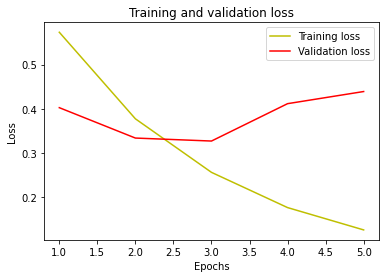

In [36]:
import matplotlib.pyplot as plt

#Validation Loss Plot
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

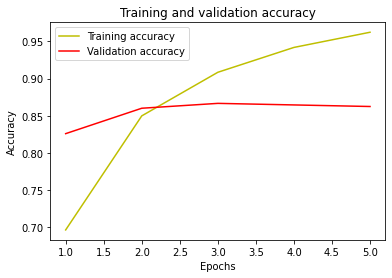

In [37]:
#Accuracy Plot
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [38]:
# Final evaluation of the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (test_acc*100))

Accuracy: 85.89%


In [43]:
# Predict the output of test data

test_pred = model.predict(np.array(X_test), verbose=0)

In [50]:
print(test_pred)

#change the predictions into 0, 1 classes
import numpy as np 
test_pred1 = np.round(np.clip(model.predict(np.array(X_test)), 0, 1))

[[9.9990797e-01]
 [7.0631504e-06]
 [9.7185373e-05]
 ...
 [9.9789006e-01]
 [7.3395291e-04]
 [1.3136401e-05]]


In [51]:
print(test_pred1)

[[1.]
 [0.]
 [0.]
 ...
 [1.]
 [0.]
 [0.]]


In [52]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, test_pred1)

array([[2748,  283],
       [ 471, 1840]])

In [53]:
#Classification Report

from sklearn.metrics import classification_report

print(classification_report(y_test, test_pred1))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      3031
           1       0.87      0.80      0.83      2311

    accuracy                           0.86      5342
   macro avg       0.86      0.85      0.85      5342
weighted avg       0.86      0.86      0.86      5342

